# Занятие 2

- Свертка + фильтрация
- Моделирование и устранение шума

In [1]:
# import packages
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Plot results
def plot_imgs(images):
    num = len(images)
    if (num % 3 == 0):
        k = 3
    else:
        k = 2
    nrows = (num + 1) // k
    fig = plt.figure(figsize=(18, 6 * nrows))
    for i in range(num):
        plt.subplot((num + 1) // k, k, i+1)
        plt.imshow(images[i])
        plt.title('image ' + str(i+1))
        plt.axis("off")
        
# Plot results
def plot_bw(images):
    num = len(images)
    if (num % 3 == 0):
        k = 3
    else:
        k = 2
    nrows = (num + 1) // k
    fig = plt.figure(figsize=(18, 6 * nrows))
    for i in range(num):
        plt.subplot((num + 1) // k, k, i+1)
        plt.imshow(images[i], cmap=cm.gray)
        plt.title('image ' + str(i+1))
        plt.axis("off")

### Свертка

[`cv2.filter2D()`](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) для свертки матрицы изображения с ядром

(Изображение - с [enjpg](https://www.enjpg.com/baby-yoda-60/))

In [3]:
img = cv2.imread('grogu.jpg')
img = cv2.resize(img, None, fx=0.5, fy=0.5)
img.shape

(960, 960, 3)

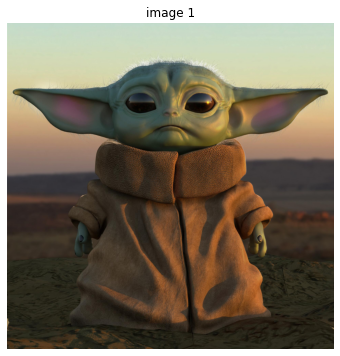

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_imgs([img])

#### Средний фильтр

array([[0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       ...,
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004]])

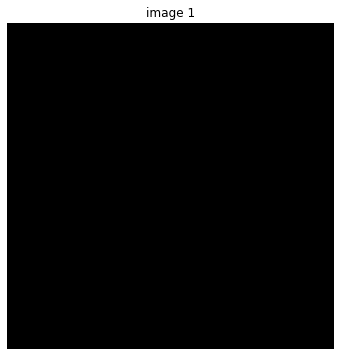

In [36]:
s = 50
kernel = np.ones((s, s)) / (s*s)
plot_bw([kernel])
kernel

In [6]:
dst = cv2.filter2D(img, -1, kernel)

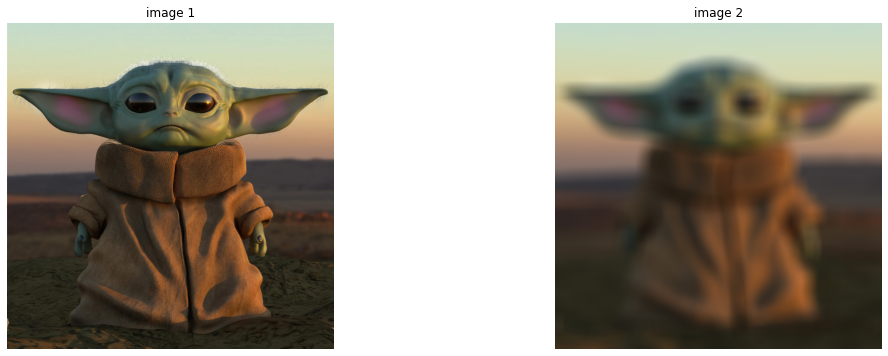

In [7]:
plot_imgs([img, dst])

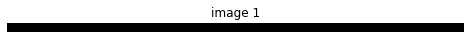

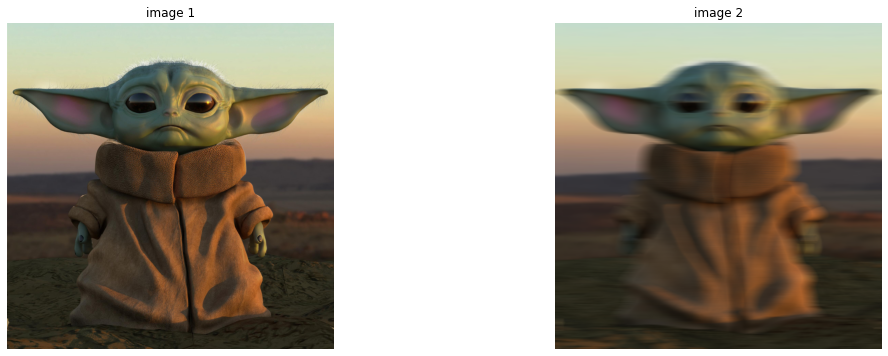

In [8]:
kernel = np.ones((1, s)) / s
plot_bw([kernel])

dst = cv2.filter2D(img, -1, kernel)
plot_imgs([img, dst])

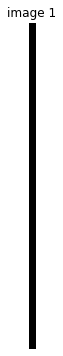

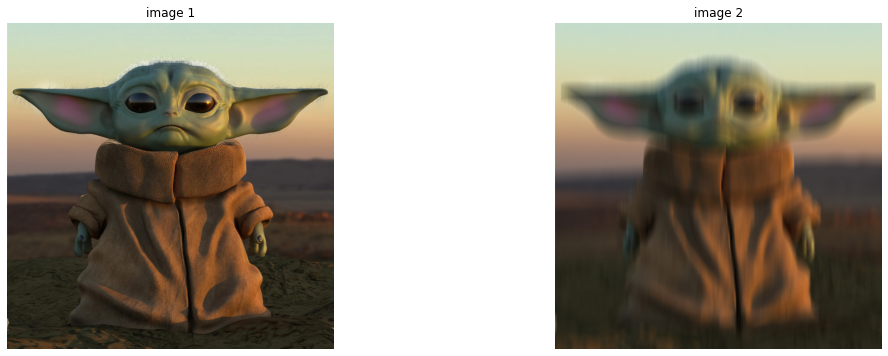

In [9]:
kernel = np.ones((s, 1)) / s
plot_bw([kernel])

dst = cv2.filter2D(img, -1, kernel)
plot_imgs([img, dst])

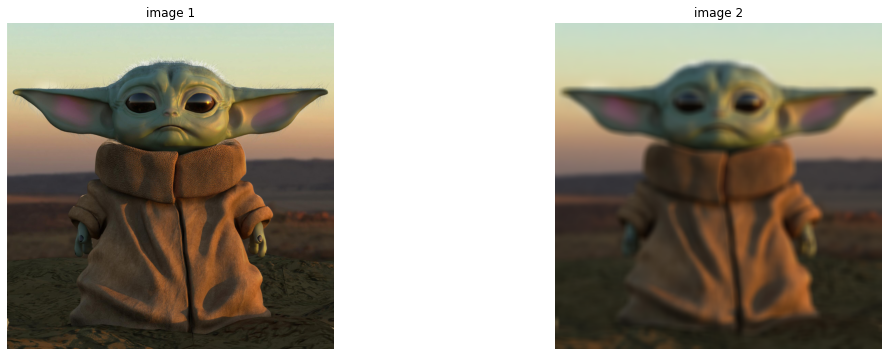

In [10]:
s = 20
hkernel = np.ones((1, s)) / s
vkernel = hkernel.transpose()

dst1 = cv2.filter2D(cv2.filter2D(img, -1, hkernel), -1, vkernel)
plot_imgs([img, dst1])

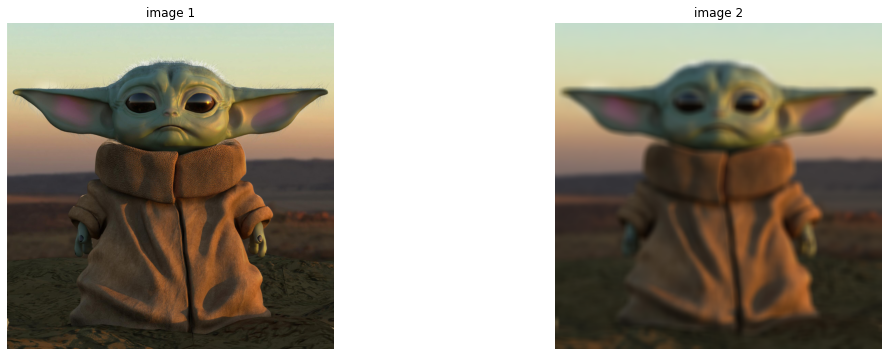

In [11]:
dst2 = cv2.filter2D(img, -1, np.ones((s, s)) / s**2)
plot_imgs([img, dst2])

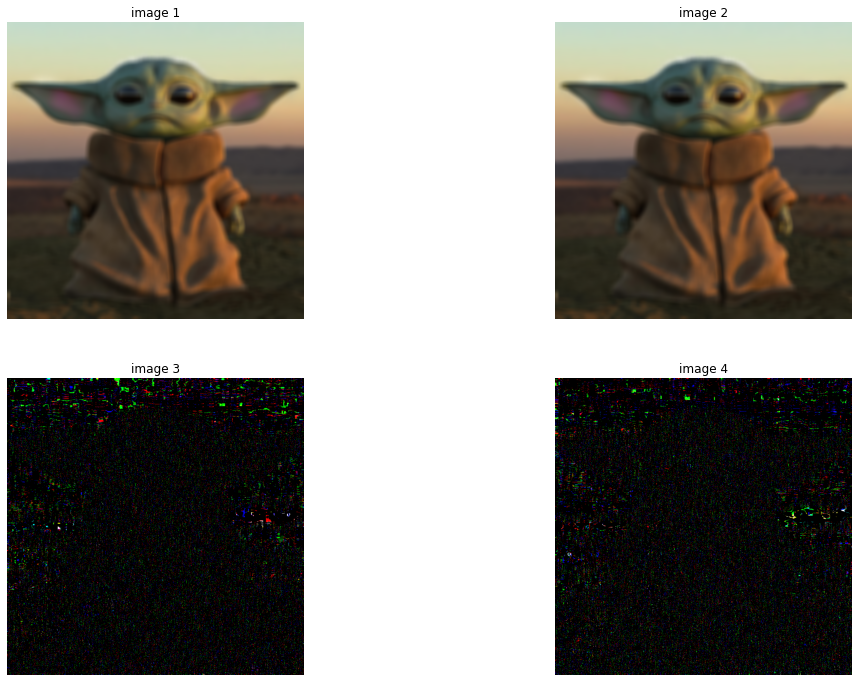

In [12]:
plot_imgs([dst1, dst2, dst1 - dst2, dst2 - dst1])

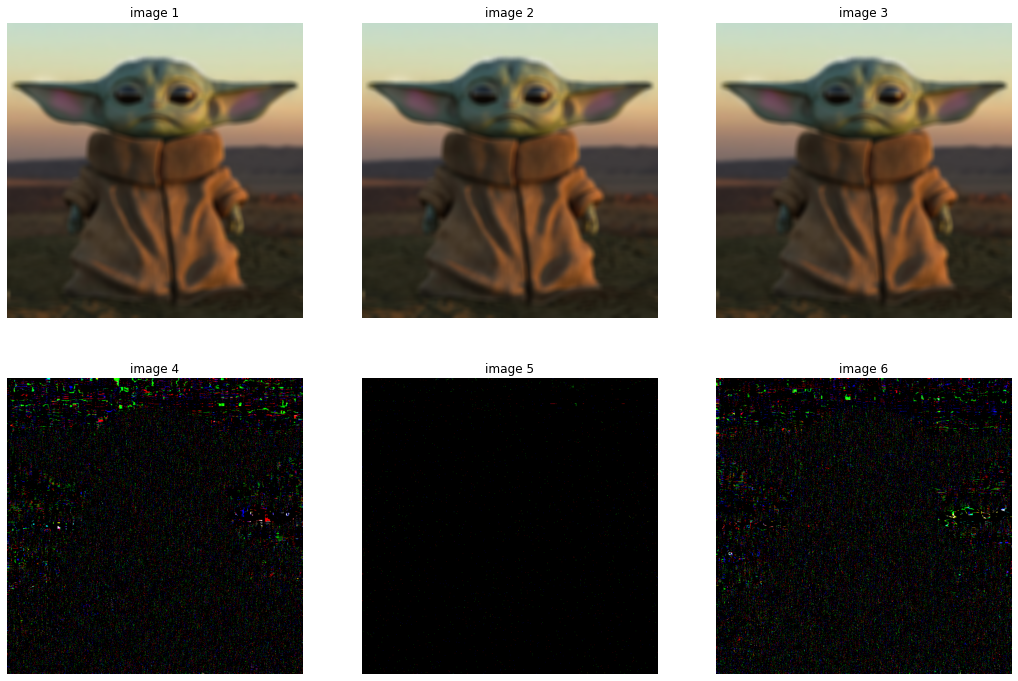

In [13]:
dst3 = cv2.blur(img, (s, s))
plot_imgs([dst1, dst2, dst3, dst1 - dst2, dst2 - dst3, dst3 - dst1])

#### Свертка средних фильтров

In [14]:
kernel = np.ones((1, 3))
dst = cv2.filter2D(kernel, -1, kernel)
(kernel, dst)

(array([[1., 1., 1.]]), array([[3., 3., 3.]]))

In [15]:
dst = np.convolve(kernel[0], kernel[0], 'full')
(kernel, dst)

(array([[1., 1., 1.]]), array([1., 2., 3., 2., 1.]))

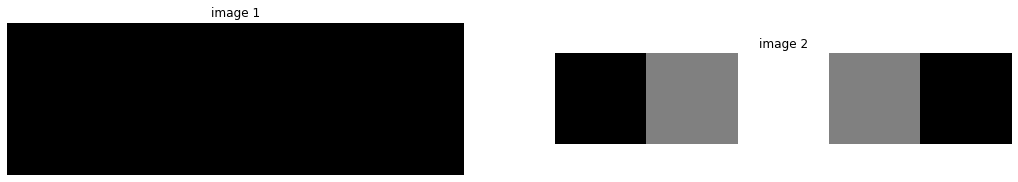

In [16]:
plot_bw([kernel, dst.reshape(1, len(dst))])

In [17]:
from scipy import signal

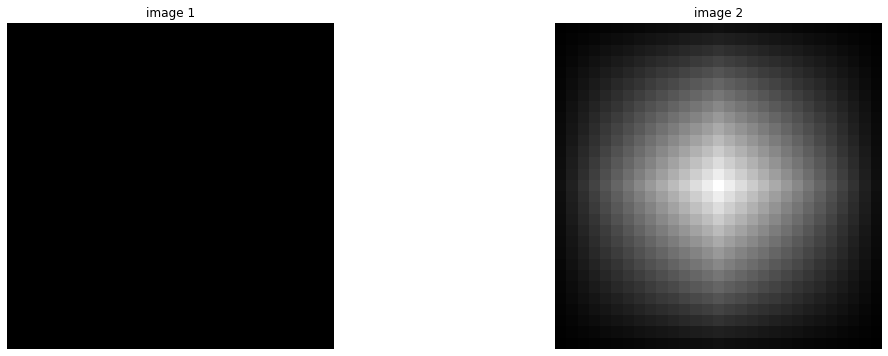

In [18]:
s = 15
kernel = np.ones((s, s))
gauss_2d = signal.convolve2d(kernel, kernel, mode='full')
plot_bw([kernel, gauss_2d])

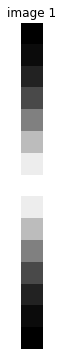

In [19]:
gauss_1d = cv2.getGaussianKernel(s, 0)
plot_bw([gauss_1d])

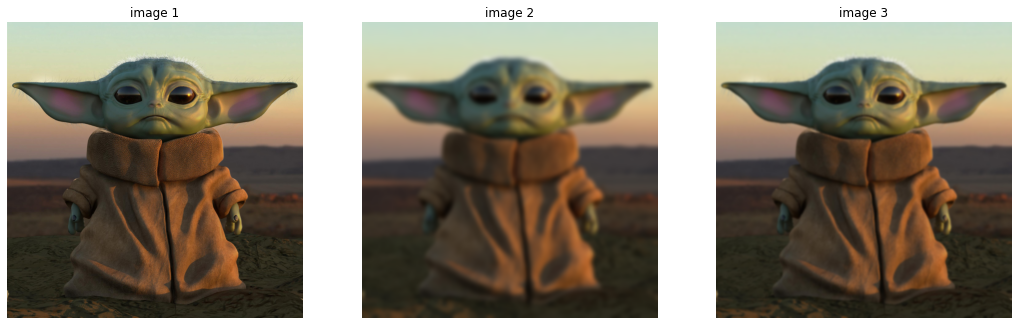

In [20]:
gauss_2d = gauss_2d / np.sum(gauss_2d)
dst0 = cv2.filter2D(img, -1, gauss_2d)
dst1 = cv2.filter2D(cv2.filter2D(img, -1, gauss_1d), -1, gauss_1d.transpose())
plot_imgs([img, dst0, dst1])

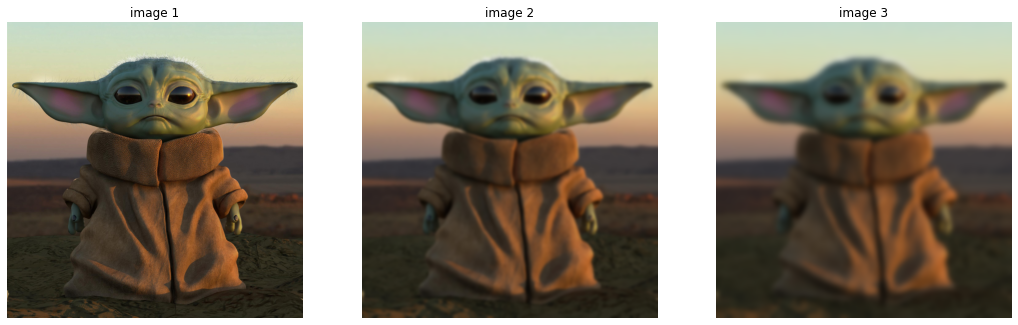

In [21]:
dst0 = cv2.GaussianBlur(img, (25, 25), 0)
dst1 = cv2.GaussianBlur(img, (55, 55), 0)
plot_imgs([img, dst0, dst1])

#### Контрастоповышающий фильтр

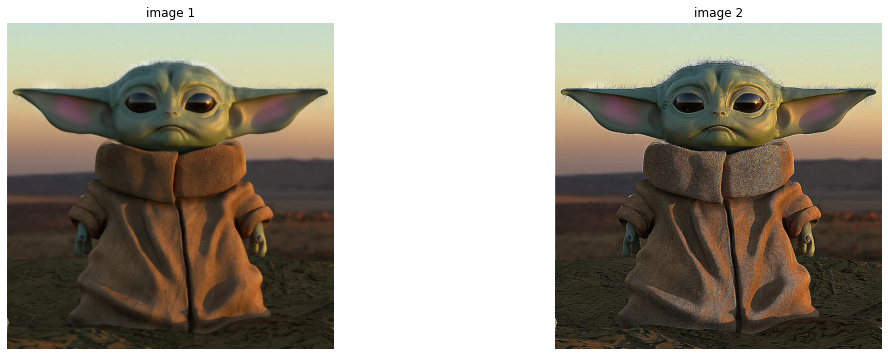

In [22]:
# high contrast filter
kernel = np.array([[-1.0, -1.0, -1.0], 
                   [-1.0, 9.0, -1.0],
                   [-1.0, -1.0, -1.0]])
dst = cv2.filter2D(img, -1, kernel)
plot_imgs([img, dst])

#### Разностный фильтр

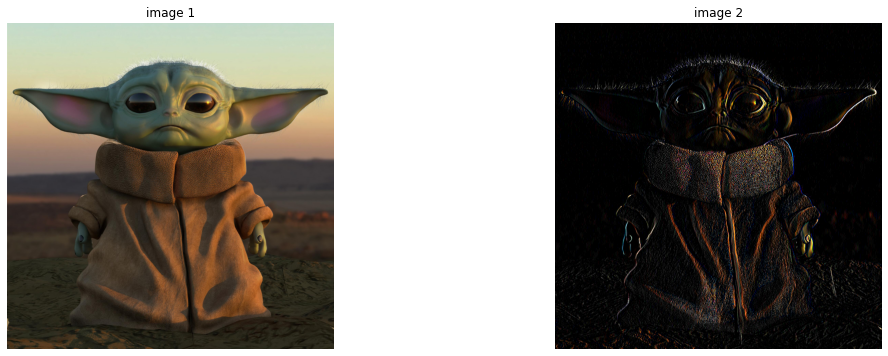

In [23]:
# edges filter
kernel = 2 * np.array([[-1.0, 0.0, 1.0], 
                       [-1.0, 0.0, 1.0],
                       [-1.0, 0.0, 1.0]])
dst = cv2.filter2D(img, -1, kernel)
plot_imgs([img, dst])

#### Медианный фильтр

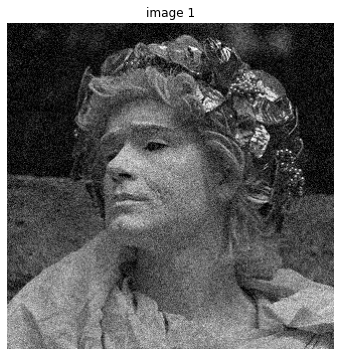

In [24]:
img = cv2.cvtColor(cv2.imread('Kodim_noisy.jpg'), cv2.COLOR_BGR2GRAY)
plot_bw([img])

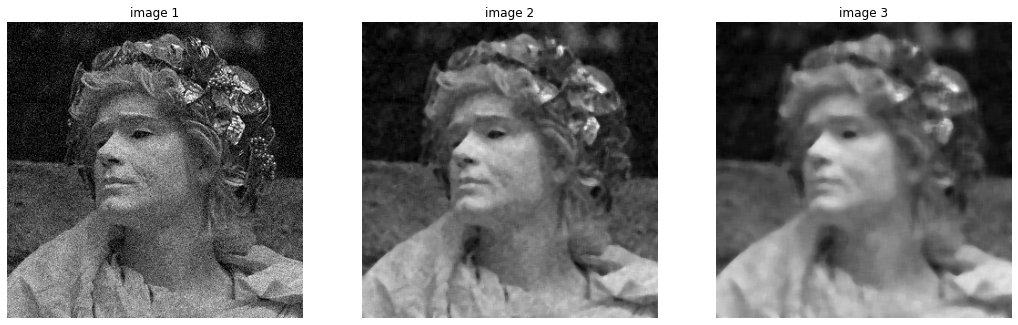

In [25]:
dst = cv2.medianBlur(img, 5)
plot_bw([img, cv2.medianBlur(img, 5), cv2.medianBlur(img, 9)])

### Моделирование шума

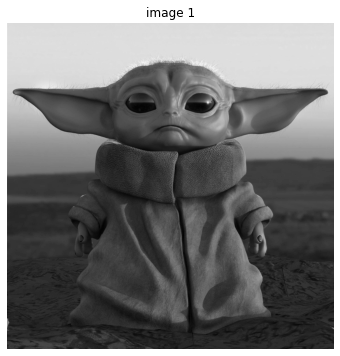

In [26]:
img = cv2.cvtColor(cv2.imread('grogu.jpg'), cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plot_bw([img])

#### Гауссов шум

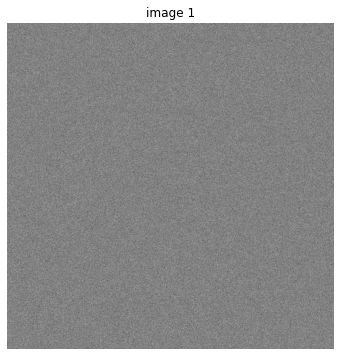

In [27]:
mean = 50
sigma = 20
gaussian = np.random.normal(mean, sigma, (img.shape[0], img.shape[1])) 
plot_bw([gaussian])

In [28]:
noisy_image = img + gaussian

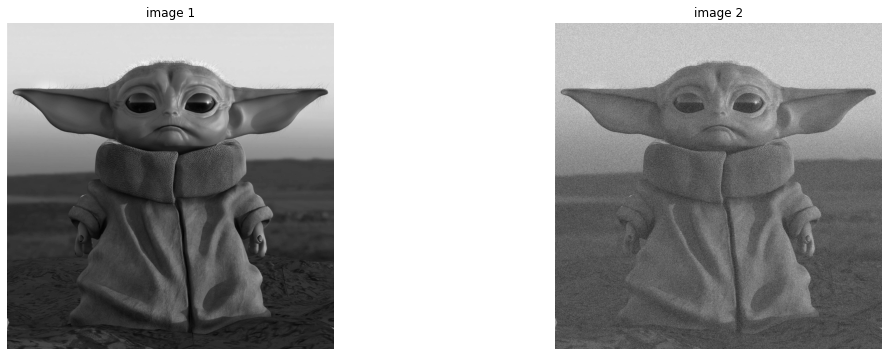

In [29]:
plot_bw([img, noisy_image])

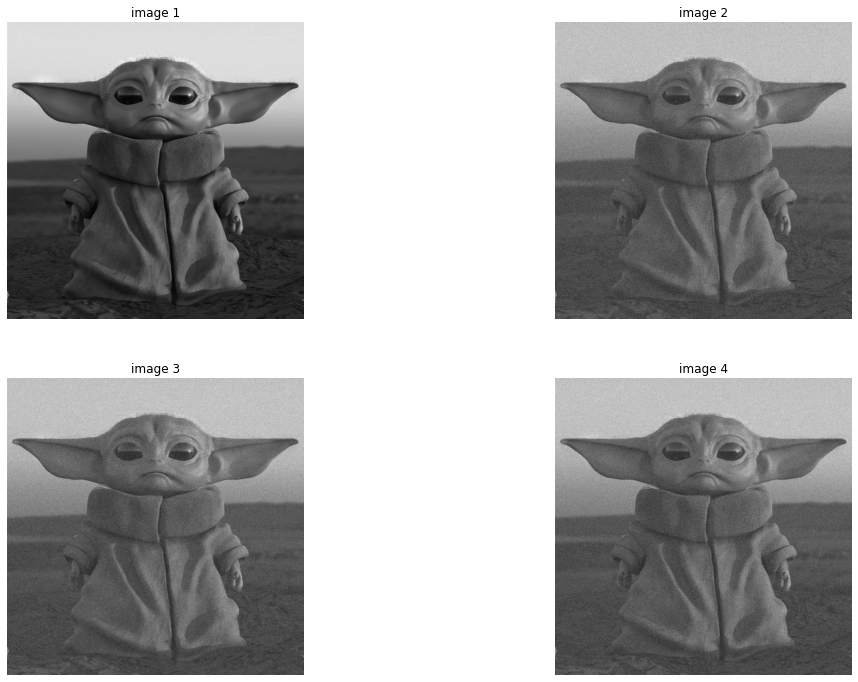

In [30]:
plot_bw([img, 
         img + np.random.normal(50, sigma, (img.shape[0], img.shape[1])),
         img + np.random.normal(100, sigma, (img.shape[0], img.shape[1])),
         img + np.random.normal(150, sigma, (img.shape[0], img.shape[1]))
        ])

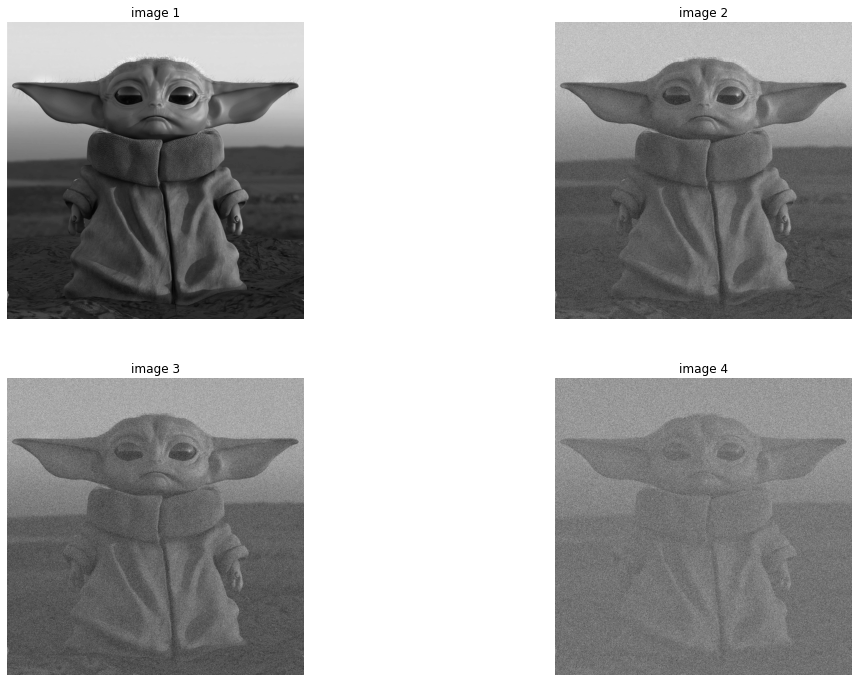

In [31]:
plot_bw([img, 
         img + np.random.normal(mean, 20, (img.shape[0], img.shape[1])),
         img + np.random.normal(mean, 40, (img.shape[0], img.shape[1])),
         img + np.random.normal(mean, 100, (img.shape[0], img.shape[1]))
        ])

#### Salt and pepper шум

In [32]:
def add_sp_noise(img, prob):
    '''
    Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image
    prob: probability (threshold) that controls level of noise
    '''

    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    
    return noisy

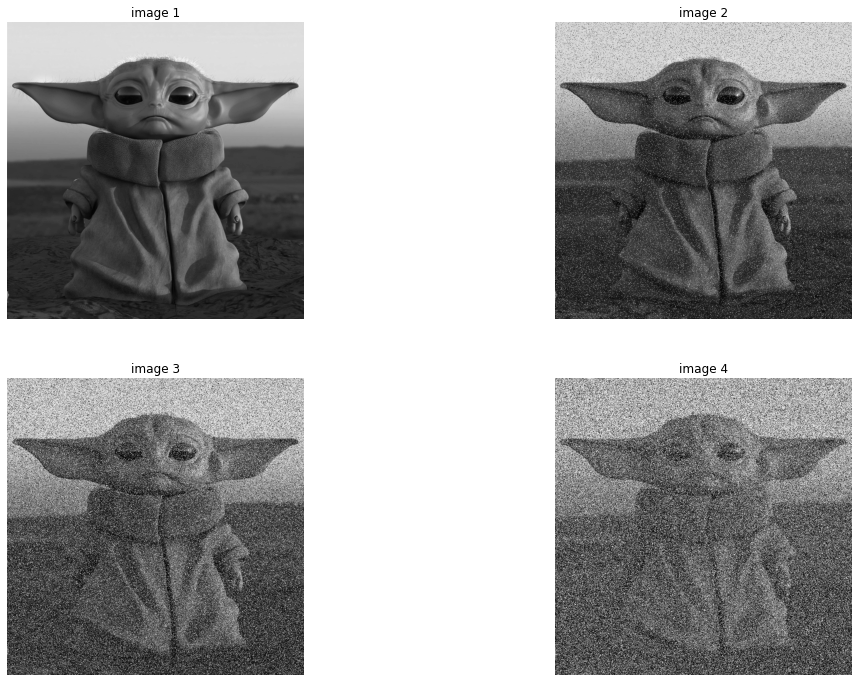

In [33]:
plot_bw([img, add_sp_noise(img, 0.05), 
         add_sp_noise(img, 0.15), add_sp_noise(img, 0.25)])

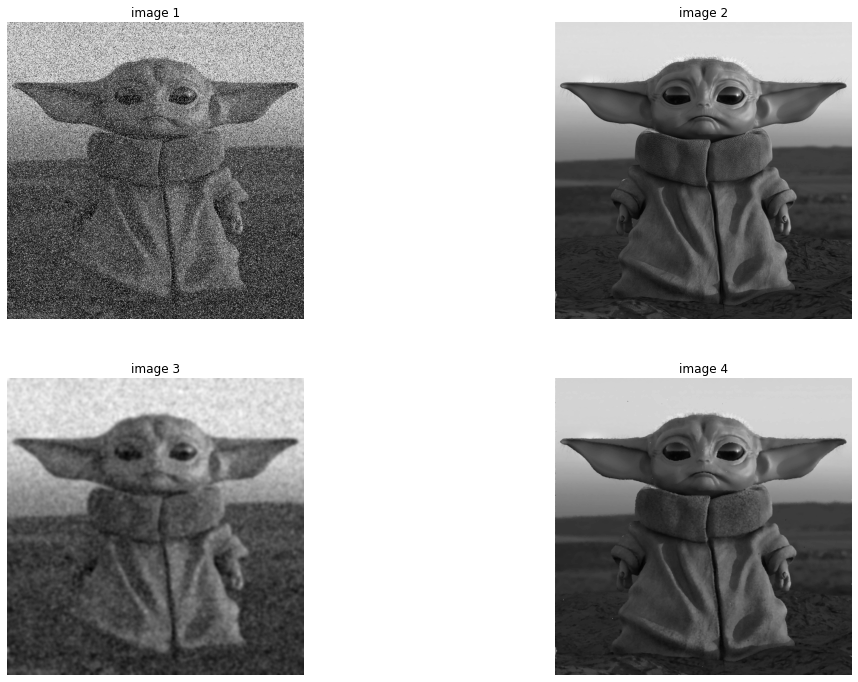

In [54]:
noisy_img = add_sp_noise(img, 0.15)
plot_bw([noisy_img, img, cv2.GaussianBlur(noisy_img, (25, 25), 0), cv2.medianBlur(noisy_img, 5)])